# Statistical Learning Lab : Assignment 9
## Name: Semanti Ghosh
## Roll No.: 22IM10036

### Importing all the necessary libraries

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import BinaryCrossentropy
from tensorflow.keras.metrics import Accuracy

### Reading and splitting the data

The data is read into a dataframe from the Excel file. Then it is divided into the training, testing and validation sets. The precentages are 70% training, 15% testing and 15%  validation. The column "Car ID" is dropped because logically, Car ID should not affect the Purhase.

In [2]:
# Load the dataset
df = pd.read_csv("Practice_car_Data.csv")

# Drop the 'Car ID' column (assuming it's not useful for prediction)
df = df.drop(columns=["Car ID"])

# Separate features (X) and target variable (y)
X = df.drop(columns=["Purchased"])
y = df["Purchased"]

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# First, split into Train and Test (85%-15%)
X_train, X_test, y_train, y_test = train_test_split( X_scaled, y, test_size=0.15, random_state=42, stratify=y)

# Then, split Train into Train and Validation (Total 85% = 15% + 75%)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.1765, random_state=42, stratify=y_train)

# Print dataset sizes
print(f"Train size: {X_train.shape[0]}, Validation size: {X_val.shape[0]}, Test size: {X_test.shape[0]}")


Train size: 279, Validation size: 61, Test size: 60


### Creating the Artificial Neural Network Model

A model with two hidden layers, having 16 and 8 units respectively, and finally an output layer was created. The two hidden layers had ReLU activation while the output layer had sigmoid activation. 


In [3]:
# Define the ANN model
#model = Sequential([
#    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),  # First hidden layer
#    Dropout(0.1),  # Dropout to prevent overfitting
#    Dense(32, activation='relu'),  # Second hidden layer
#    Dense(16, activation='relu'),  # Third hidden layer    
#    Dense(1, activation='sigmoid')  # Output layer for binary classification
#])

model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.2),
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(16, activation='relu'),
    Dense(1, activation='sigmoid')
])

# Show the ANN layers
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               512       
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dense_2 (Dense)             (None, 32)                2080      
                                                                 
 dense_3 (Dense)             (None, 16)                528       
                                                                 
 dense_4 (Dense)             (None, 1)                 17        
                                                                 
Total params: 11393 (44.50 KB)
Trainable params: 11393 (

### Training the ANN Model
Optimiser used: Adam (with a learning rate of 0.001)
Loss: Binary Crossentropy Loss (since, the output is binary and categorical)
Performance Metric: Accuracy

In [4]:
# Compile the model 
model.compile(optimizer='adam', 
              loss="binary_crossentropy", 
              metrics=["accuracy"])

# Train the model
history = model.fit(X_train, y_train, 
                    validation_data=(X_val, y_val), 
                    epochs=50, batch_size=8, verbose=1)


Epoch 1/50
35/35 [==============================] - 3s 17ms/step - loss: 0.6523 - accuracy: 0.7276 - val_loss: 0.5847 - val_accuracy: 0.8197
Epoch 2/50
35/35 [==============================] - 0s 5ms/step - loss: 0.5786 - accuracy: 0.7742 - val_loss: 0.5302 - val_accuracy: 0.8197
Epoch 3/50
35/35 [==============================] - 0s 5ms/step - loss: 0.5469 - accuracy: 0.7814 - val_loss: 0.5154 - val_accuracy: 0.8197
Epoch 4/50
35/35 [==============================] - 0s 6ms/step - loss: 0.5402 - accuracy: 0.7814 - val_loss: 0.5001 - val_accuracy: 0.8197
Epoch 5/50
35/35 [==============================] - 0s 6ms/step - loss: 0.5289 - accuracy: 0.7814 - val_loss: 0.5073 - val_accuracy: 0.8033
Epoch 6/50
35/35 [==============================] - 0s 5ms/step - loss: 0.5194 - accuracy: 0.7921 - val_loss: 0.4900 - val_accuracy: 0.8197
Epoch 7/50
35/35 [==============================] - 0s 5ms/step - loss: 0.5228 - accuracy: 0.7885 - val_loss: 0.4876 - val_accuracy: 0.8197
Epoch 8/50
35/35 [=

In [5]:
from sklearn.metrics import accuracy_score

y_train_pred_prob = model.predict(X_train)

y_train_pred = (y_train_pred_prob > 0.5).astype(int)

# Manually calculate accuracy
manual_accuracy = accuracy_score(y_train, y_train_pred)

print(f"Manual Accuracy: {manual_accuracy:.4f}")


9/9 [==============================] - 0s 2ms/step
Manual Accuracy: 0.8244


In [6]:
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f"Test Accuracy: {test_accuracy:.4f}")

Test Accuracy: 0.7000


### Analysis of Results

### Plot of the Train set and Validation set Accuracy over Epochs

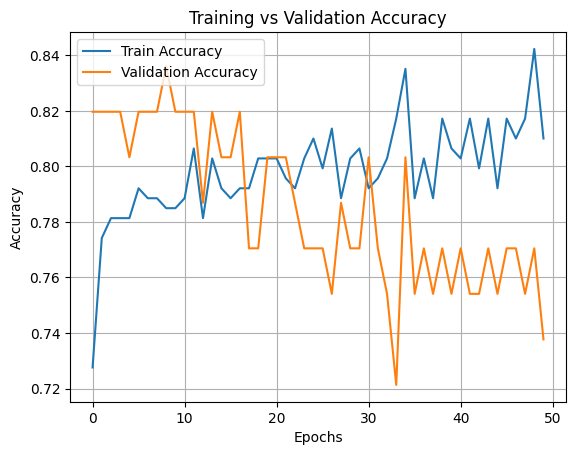

In [7]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')

# Labels and Title
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training vs Validation Accuracy')
plt.legend()
plt.grid(True)

# Show the plot
plt.show()


### Plot of the Train set and Validation set Loss over Epochs

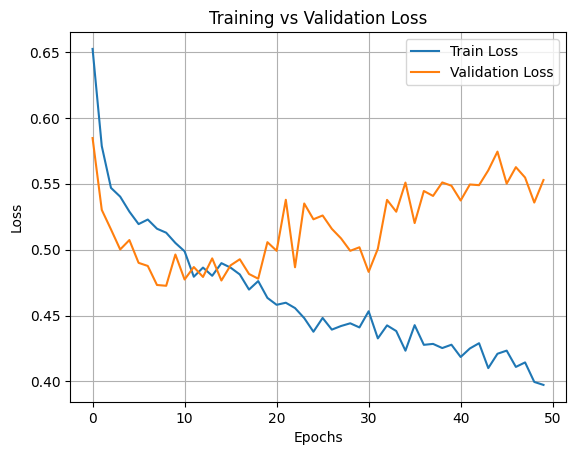

In [8]:
# Plot training & validation loss values
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')

# Labels and Title
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training vs Validation Loss')
plt.legend()
plt.grid(True)

# Show the plot
plt.show()


### Evaluating the Model on the Test set

In [9]:
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=2)

print(f"Test Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")


2/2 - 0s - loss: 0.7058 - accuracy: 0.7000 - 53ms/epoch - 26ms/step
Test Loss: 0.7058
Test Accuracy: 0.7000


###  Classification Report and Confusion Matrix

In [10]:
from sklearn.metrics import classification_report, confusion_matrix

# Predict class labels for the test set
y_pred_prob = model.predict(X_test)
y_pred = (y_pred_prob > 0.5).astype(int)  # Convert probabilities to binary class labels

# Print classification report
print("Classification Report:\n", classification_report(y_test, y_pred))

# Compute and display confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)


2/2 [==============================] - 0s 4ms/step
Classification Report:
               precision    recall  f1-score   support

           0       0.73      0.85      0.79        39
           1       0.60      0.43      0.50        21

    accuracy                           0.70        60
   macro avg       0.67      0.64      0.64        60
weighted avg       0.69      0.70      0.69        60

Confusion Matrix:
 [[33  6]
 [12  9]]
